#**Important**
This project is using google colab to get better performance.

All information taken from here <a href='https://cs50.harvard.edu/ai/2020/projects/5/traffic/'> CS50 AI </a>. 


#**Background**

As research continues in the development of self-driving cars, one of the key challenges is computer vision, allowing these cars to develop an understanding of their environment from digital images. In particular, this involves the ability to recognize and distinguish road signs – stop signs, speed limit signs, yield signs, and more.

In this project, you’ll use TensorFlow to build a neural network to classify road signs based on an image of those signs. To do so, you’ll need a labeled dataset: a collection of images that have already been categorized by the road sign represented in them.

For more information about the project <a href='https://cs50.harvard.edu/ai/2020/projects/5/traffic/'> Traffic </a>. 

run code below to install this project’s dependencies: **opencv-python** for image processing, **scikit-learn** for ML-related functions, and **tensorflow** for neural networks.

#**Getting Started**

In [2]:
!pip install wget
!pip install tensorflow

In [15]:
import tensorflow as tf
import cv2 as cv
import numpy as np
import os
import sys
import wget
import shutil

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Download the data set for this project and unzip it**




In [4]:
url = 'https://cdn.cs50.net/ai/2020/x/projects/5/gtsrb.zip'
wget.download(url)

'gtsrb (1).zip'

In [5]:
shutil.unpack_archive('./gtsrb.zip', './')

#**Understanding**
First, take a look at the data set by opening the gtsrb directory. You’ll notice 43 subdirectories in this dataset, numbered 0 through 42. Each numbered subdirectory represents a different category (a different type of road sign). Within each traffic sign’s directory is a collection of images of that type of traffic sign.

Next, take a look at traffic.py. In the main function, we accept as command-line arguments a directory containing the data and (optionally) a filename to which to save the trained model. The data and corresponding labels are then loaded from the data directory (via the load_data function) and split into training and testing sets. After that, the get_model function is called to obtain a compiled neural network that is then fitted on the training data. The model is then evaluated on the testing data. Finally, if a model filename was provided, the trained model is saved to disk.

**Constant variables**

In [16]:
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

In [17]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """
    images = []
    labels = []

    # Loop on all files with directories
    for root, subdir, files in os.walk(data_dir):
        
        # Loop on all images in directory
        for image in files:
            img = cv.imread(os.path.join(root, image))
            img = cv.resize(img, (IMG_WIDTH, IMG_HEIGHT))        
            images.append(img)

            # Get the directory the image is in
            labels.append(int(os.path.basename(root)))
    
    return images, labels

In [18]:
# Get image arrays and labels for all image files
images, labels = load_data('./gtsrb')

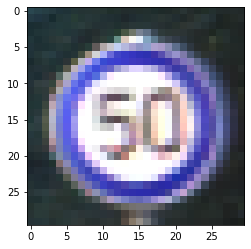

In [19]:
# Example of a picture
index = 1
#print(images.shape)
plt.imshow(images[index])


In [20]:
# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)


In [11]:
m_train = x_train.shape[0] # number of training examples
m_test = x_test.shape[0]   # number of test examples
num_px = x_train.shape[1]  # = height = width of a training image

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: m_train = 15984
Number of testing examples: m_test = 10656
Height/Width of each image: num_px = 30
Each image is of size: (30, 30, 3)
x_train shape: (15984, 30, 30, 3)
y_train shape: (15984, 43)
x_test shape: (10656, 30, 30, 3)
y_test shape: (10656, 43)


In [34]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    
    # Create a neural network
    model = tf.keras.models.Sequential([

    # Convolutional layer. Learn 32 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(
        8, (5, 5), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
    ),

    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    tf.keras.layers.Conv2D(
        32, (3, 3), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
    ),

    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),



    # Second convolutional layer
    tf.keras.layers.Conv2D(
        32, (3, 3), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
    ),





    # Flatten units
    tf.keras.layers.Flatten(),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # Add an output layer with output units for all 10 digits
    tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")

    ])

    # Summary the model
    #model.summary()

    # Train neural network
    model.compile(
        optimizer = "adam",
        loss = "categorical_crossentropy",
        metrics = ["accuracy"]
    )

    return model

In [35]:
# Get a compiled neural network
model = get_model()


In [36]:
# Fit model on training data
model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/10
500/500 [==============================] - 12s 22ms/step - loss: 3.0814 - accuracy: 0.3070
Epoch 2/10
500/500 [==============================] - 11s 22ms/step - loss: 1.2726 - accuracy: 0.6465
Epoch 3/10
500/500 [==============================] - 11s 22ms/step - loss: 0.7756 - accuracy: 0.7812
Epoch 4/10
500/500 [==============================] - 12s 23ms/step - loss: 0.5176 - accuracy: 0.8525
Epoch 5/10
500/500 [==============================] - 11s 22ms/step - loss: 0.4179 - accuracy: 0.8813
Epoch 6/10
500/500 [==============================] - 11s 22ms/step - loss: 0.3382 - accuracy: 0.9012
Epoch 7/10
500/500 [==============================] - 11s 23ms/step - loss: 0.2898 - accuracy: 0.9150
Epoch 8/10
500/500 [==============================] - 11s 23ms/step - loss: 0.2426 - accuracy: 0.9284
Epoch 9/10
500/500 [==============================] - 11s 22ms/step - loss: 0.2387 - accuracy: 0.9338
Epoch 10/10
500/500 [==============================] - 12s 23ms/step - loss: 0.206

In [37]:
# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)


333/333 - 3s - loss: 0.2007 - accuracy: 0.9479 - 3s/epoch - 8ms/step


[0.20073269307613373, 0.9479166865348816]

In [ ]:
# Save model to file
filename = 'traffic'
model.save(filename)